# Balancing Dataset

The dataset might not contain the required amount of each class data and there can be imbalance in the dataset. This notebook is to balance that ataset before it can be used for training

In [1]:
import os
import cv2
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def count_damage_type(source):
    # read the list of json files
    file_list = [f for f in os.listdir(source) if f.endswith('.json')]
    
    dent_list = []
    damage_list = []
    scratch_list = []
    
    for file in file_list:
        file_path = os.path.join(source, file)
        with open(file_path, 'r') as op:
            json_data = json.load(op)
        # extract the damage type
        for shape in json_data['shapes']:
            damage_type = shape['label']
            damage = damage_type.lower()
            if damage == 'scratch':
                scratch_list.append(file)
            elif damage == 'dent':
                dent_list.append(file)
            else:
                damage_list.append(file)
    
    return scratch_list, dent_list, damage_list

In [3]:
source = r'train'
train_scratch_list, train_dent_list, train_damage_list = count_damage_type(source)

In [4]:
print('Number of scratch train data points:', len(train_scratch_list))
print('Number of dent train data points:', len(train_dent_list))
print('Number of damage train data points:', len(train_damage_list))

Number of scratch train data points: 215
Number of dent train data points: 210
Number of damage train data points: 128


In [5]:
source = r'test'
test_scratch_list, test_dent_list, test_damage_list = count_damage_type(source)

In [6]:
print('Number of scratch train data points:', len(test_scratch_list))
print('Number of dent train data points:', len(test_dent_list))
print('Number of damage train data points:', len(test_damage_list))

Number of scratch train data points: 64
Number of dent train data points: 43
Number of damage train data points: 42


In [7]:
class_names = ['scratch', 'dent', 'damage']

In [8]:
# generate a list that contains one color for each class
colors = sns.color_palette(None, len(class_names))

# print class name - normalized RGB tuple pairs
# the tuple values will be multiplied by 255 in the helper functions later
# to convert to the (0,0,0) to (255,255,255) RGB values you might be familiar with
for class_name, color in zip(class_names, colors):
    print(f'{class_name} -- {color}')

scratch -- (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
dent -- (1.0, 0.4980392156862745, 0.054901960784313725)
damage -- (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)


In [10]:
def give_color_to_annotation(annotation):
    '''
    Converts a 3-D annotation of shape (height, width, number_of_classes) to a numpy array with shape (height, width, 3) where
    the third axis represents the color channel. The label values are multiplied by
    255 and placed in this axis to give color to the annotation

    Args:
    annotation (numpy array) - label map array

    Returns:
    the annotation array with an additional color channel/axis
    '''
    seg_img = np.zeros((annotation.shape[0], annotation.shape[1], 3)).astype('float')

    for c in range(len(class_names)):
        segc = (annotation == c+1)
        #a = segc*(colors[c][0] * 255.0)
        #print(segc.astype('int').max())
        seg_img[:,:,0] += segc*( colors[c][0] * 255.0)
        seg_img[:,:,1] += segc*( colors[c][1] * 255.0)
        seg_img[:,:,2] += segc*( colors[c][2] * 255.0)
        #print(seg_img[300, 600])

    return seg_img.astype('int')

In [13]:
def show_images_mask(n=5):
    fl = os.listdir('train_images')
    for f in fl[:n]:
        img = cv2.imread(os.path.join('train_images',f))
        mask = np.load(os.path.join('train_pixel_masks', f+'.npy'))
        #mask = cv2.imread(os.path.join('train_pixel_masks', f))
        mask = give_color_to_annotation(mask)
        fig = plt.figure(figsize=(20,30))
        fig.add_subplot(1, 2, 1)
        plt.imshow(img)
        fig.add_subplot(1, 2, 2)
        plt.imshow(mask)
        plt.title(f)
        plt.show()

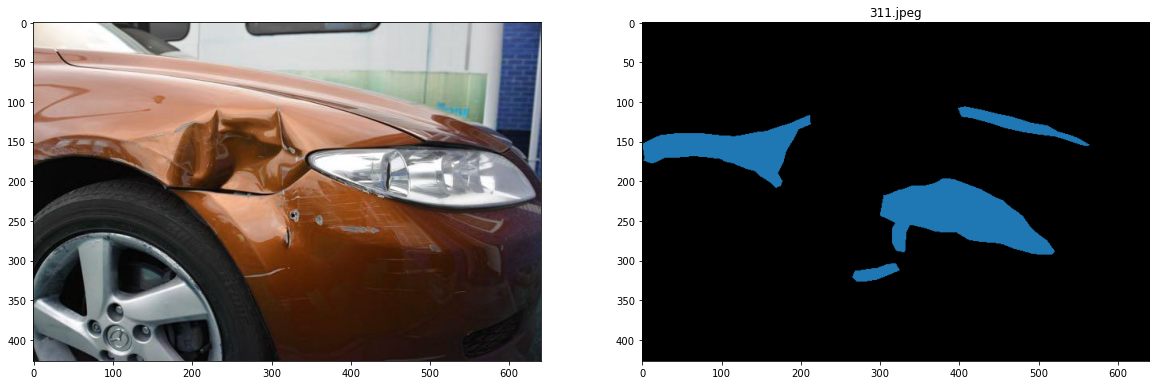

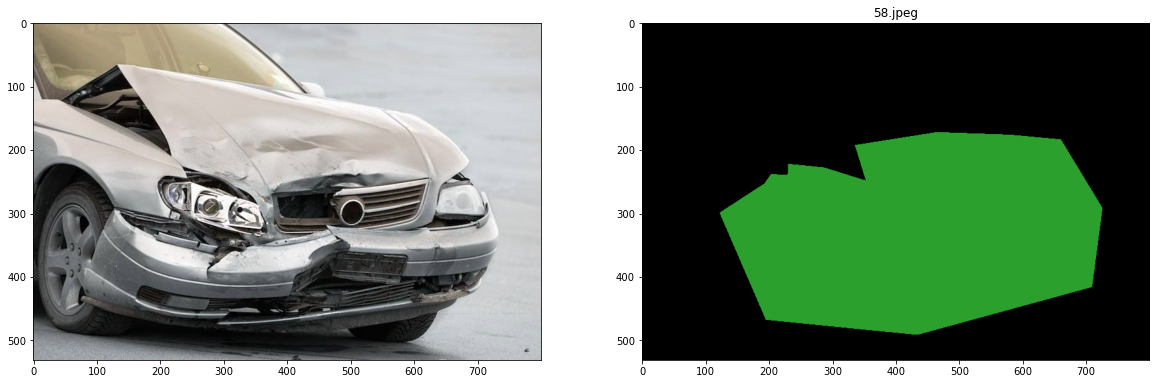

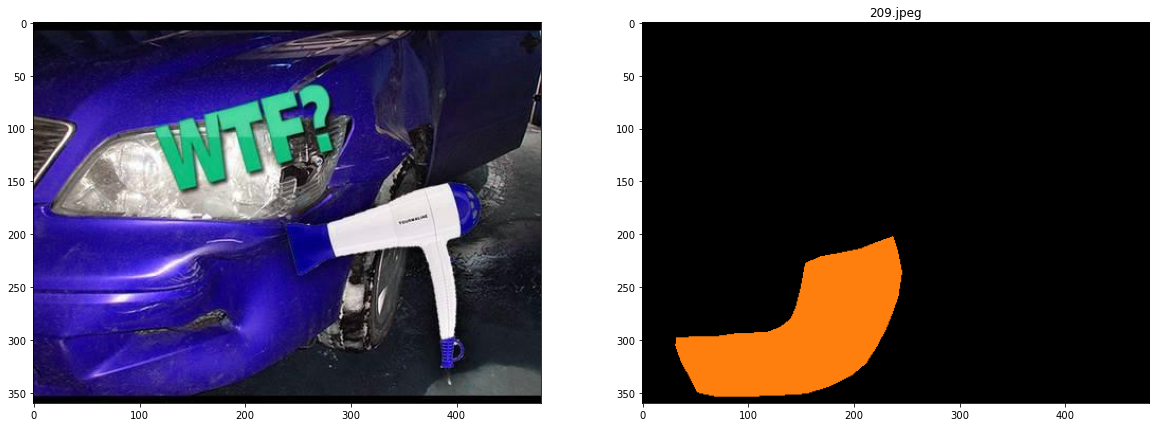

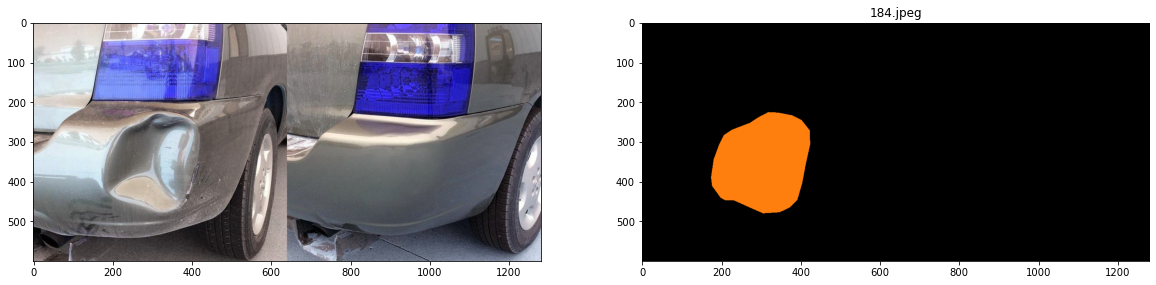

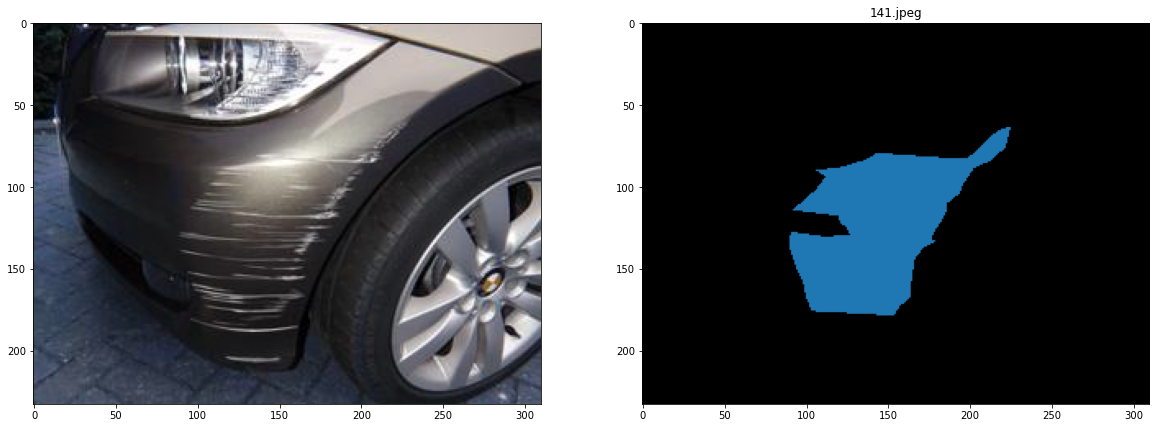

In [14]:
show_images_mask()